In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 65 大气压

result1 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,:]
    A = np.nanmean(plot65)
    result1[i] = A
    i = i + 1

In [3]:
# 40 大气压

result2 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,:]
    A = np.nanmean(plot40)
    result2[i] = A
    i = i + 1

In [4]:
std1 = np.std(result1)
ave1 = np.nanmean(result1)
final65 = (result1 - ave1)/std1

In [5]:
std2 = np.std(result2)
ave2 = np.nanmean(result2)
final40 = (result2 - ave2)/std2

In [6]:
ddd1 = final65-final40

In [7]:
ddd1.shape

(3720,)

In [8]:
# 65 大气压

result1 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,:]
    A = np.nanmean(plot65)
    result1[i] = A
    i = i + 1

In [9]:
# 40 大气压

result2 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,:]
    A = np.nanmean(plot40)
    result2[i] = A
    i = i + 1

In [10]:
std1 = np.std(result1)
ave1 = np.nanmean(result1)
final65 = (result1 - ave1)/std1

In [11]:
std2 = np.std(result2)
ave2 = np.nanmean(result2)
final40 = (result2 - ave2)/std2

In [12]:
ddd3 = final65-final40

In [13]:
ddd3.shape

(1955,)

In [14]:
result1 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,:]
    A = np.nanmean(plot65)
    result1[i] = A
    i = i + 1

In [15]:
result2 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,:]
    A = np.nanmean(plot40)
    result2[i] = A
    i = i + 1

In [16]:
std = np.std(result1)
ave = np.nanmean(result1)
final65 = (result1 - ave)/std

In [17]:
std = np.std(result2)
ave = np.nanmean(result2)
final40 = (result2 - ave)/std

In [18]:
ddd2 = final65-final40

In [19]:
ddd2.shape

(96,)

In [20]:
xx1 = np.hstack((ddd1,ddd2))
xx2 = np.hstack((xx1,ddd3))

In [21]:
xx2.shape

(5771,)

In [22]:
5770/12

480.8333333333333

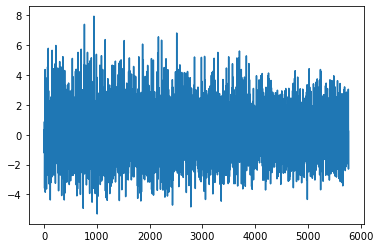

In [23]:
plt.plot(xx2)

In [24]:
ww2 = np.convolve(xx2, np.ones((60,))/60, mode='valid')
ave = np.nanmean(ww2)

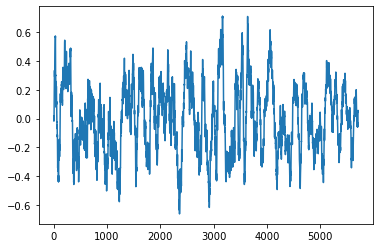

In [25]:
plt.plot(ww2)

In [26]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

list_before = wspxx
list_after = [val for val in list_before for i in range(12)]
xxx = np.reshape(list_after,(123,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]
mrpxxx = np.reshape(list_after,(233,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(117,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

ValueError: cannot reshape array of size 1272 into shape (123,12)

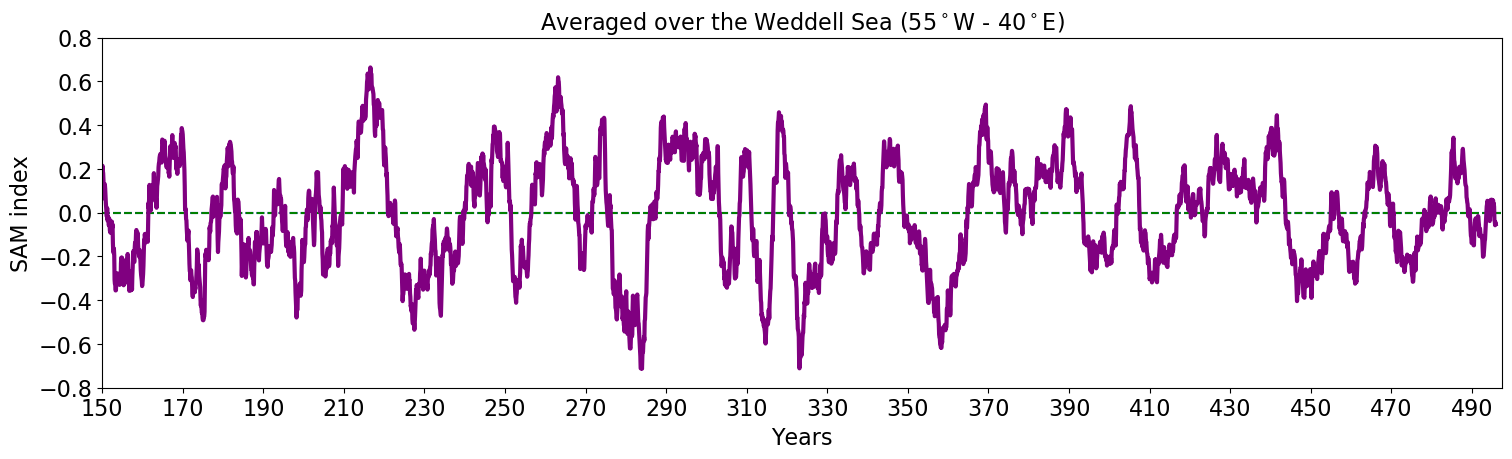

In [30]:
#t = np.arange(36,3697,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww2[1560:],'purple',linewidth=3)
plt.hlines(ave, 0, 4200, colors = "blue",linestyles = "dashed")
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.vlines(noxxx, -0.65, 0.65, colors = "grey")
#plt.vlines(mrpxxx, -0.65, 0.65, colors = "blue")
#plt.vlines(xxx, -0.65, 0.65, colors = "yellow")
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SAM index',color= 'black',**my_font)
plt.axis("tight")
plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.8, 0.8),xlim=(0, 4170))
ax0.set_title('Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E)',**my_font)
plt.savefig("SAMnew1.png",bbox_inches='tight',dpi=fig.dpi)